In [17]:
import pandas as pd
import numpy as np

data = pd.read_csv("AdjustedPrices.csv", index_col="Date", parse_dates=True)

monthly_returns = data.pct_change()
expected_returns = monthly_returns.mean()
covariance_matrix = monthly_returns.cov()

# Display the results
print(len(expected_returns))
print("Expected Returns:")
print(expected_returns)
print("\nCovariance Matrix:")
print(covariance_matrix)

30
Expected Returns:
AAPL     0.026626
MSFT     0.019973
AMZN     0.009288
NVDA     0.034876
TSLA     0.063210
BRK-B    0.009006
GOOG     0.012373
XOM      0.015727
UNH      0.017070
JPM      0.010172
JNJ      0.006550
META     0.008590
V        0.013276
PG       0.012897
HD       0.013183
MA       0.015746
CVX      0.013732
ABBV     0.015528
MRK      0.016631
LLY      0.028369
AVGO     0.022601
BAC      0.008493
PEP      0.011618
KO       0.009610
PFE      0.009207
COST     0.019387
TMO      0.018737
WMT      0.010949
CSCO     0.007607
MCD      0.012301
dtype: float64

Covariance Matrix:
           AAPL      MSFT      AMZN      NVDA      TSLA     BRK-B      GOOG  \
AAPL   0.008835  0.003998  0.006242  0.009437  0.012490  0.002927  0.003906   
MSFT   0.003998  0.003785  0.004272  0.006019  0.007150  0.002033  0.003325   
AMZN   0.006242  0.004272  0.009931  0.008795  0.011679  0.002565  0.004905   
NVDA   0.009437  0.006019  0.008795  0.021735  0.014039  0.003969  0.006193   
TSLA   0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


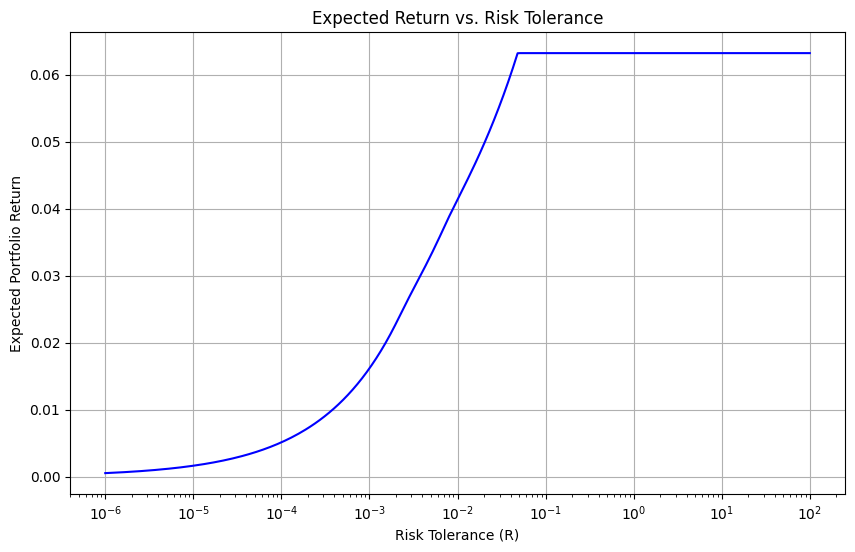

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

data = pd.read_csv("AdjustedPrices.csv", index_col="Date", parse_dates=True)

monthly_returns = data.pct_change().dropna()

expected_returns = monthly_returns.mean()
expected_returns_array = expected_returns.values

covariance_matrix = monthly_returns.cov()

n_assets = len(data.columns)

risk_values = np.logspace(-6, 2, 300)

portfolio_returns = []

budget = 1

for R in risk_values:
    x = cp.Variable(n_assets)
    return_objective = cp.Maximize(expected_returns_array @ x)
    constraints = [cp.sum(x) <= budget, cp.quad_form(x, covariance_matrix) <= R, x >= 0]
    problem = cp.Problem(return_objective, constraints)
    problem.solve()
    if x.value is not None and problem.status == "optimal":
        portfolio_returns.append(x.value @ expected_returns_array)
    else:
        portfolio_returns.append(
            0
        )  

plt.figure(figsize=(10, 6))
plt.semilogx(risk_values, portfolio_returns, "b-")
plt.title("Expected Return vs. Risk Tolerance")
plt.xlabel("Risk Tolerance (R)")
plt.ylabel("Expected Portfolio Return")
plt.grid(True)
plt.show()

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

data = pd.read_csv("AdjustedPrices.csv", index_col="Date", parse_dates=True)

monthly_returns = data.pct_change().dropna()

expected_returns = monthly_returns.mean()
expected_returns_array = expected_returns.values

covariance_matrix = monthly_returns.cov()

n_assets = len(data.columns)

risk_values = np.logspace(-6, 2, 300)

portfolio_returns = []

budget = 1

R = 10**(-4)
x = cp.Variable(n_assets)
return_objective = cp.Maximize(expected_returns_array @ x)
constraints = [cp.sum(x) <= budget, cp.quad_form(x, covariance_matrix) <= R, x >= 0]
problem = cp.Problem(return_objective, constraints)
problem.solve()
if x.value is not None and problem.status == "optimal":
    portfolio_returns.append(x.value @ expected_returns_array)
else:
    portfolio_returns.append(0)
print(x.value)
print(sum(x.value))

[1.55403958e-09 1.68032098e-09 4.27305453e-10 1.57446165e-02
 1.48108419e-02 7.01588290e-10 7.36871797e-10 1.97074788e-04
 2.95228538e-09 8.99116171e-10 4.65487429e-10 9.63829672e-10
 1.23339286e-09 7.64382413e-02 1.32436109e-09 1.56267892e-09
 9.38761053e-10 1.04097891e-02 1.82849849e-02 7.21721717e-02
 2.10593249e-09 4.66615303e-10 1.67206206e-09 1.96898955e-09
 5.75122924e-10 6.32318170e-03 2.97471042e-09 1.87524758e-09
 3.98680964e-10 6.29313137e-09]
0.21438093569569466


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


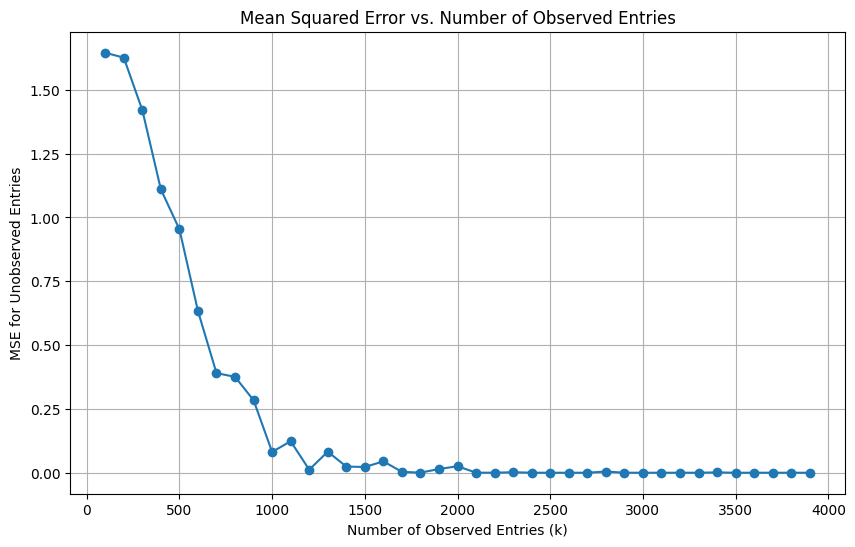

In [48]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# Redefine matrix Z and parameters
np.random.seed(42)  # Seed for reproducibility
m, n, r = 100, 100, 2
U = np.random.randn(m, r)
V = np.random.randn(n, r)
Z = U @ V.T

# Array of k values from 100 to 4000, increasing by 100
k_values = range(100, 4000, 100)
mse_results = []

# Loop over each k value
for k in k_values:
    # Select k entries uniformly at random to observe
    omega_indices = np.random.choice(m * n, k, replace=False)
    omega_i, omega_j = np.unravel_index(omega_indices, (m, n))

    # Mask for observed entries
    mask = np.zeros((m, n), dtype=bool)
    mask[omega_i, omega_j] = True

    # Define CVXPY problem for matrix completion
    X = cp.Variable((m, n))
    W1 = cp.Variable((m, n), PSD=True)
    W2 = cp.Variable((m, n), PSD=True)

    # Constraints including observed values
    constraints = [cp.bmat([[W1, X], [X.T, W2]]) >> 0]
    for i, j in zip(omega_i, omega_j):
        constraints.append(X[i, j] == Z[i, j])

    # Objective
    objective = cp.Minimize(cp.trace(W1) + cp.trace(W2))

    # Define and solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS)

    # Recovered matrix X after optimization
    recovered_X = X.value

    # Calculate MSE for unobserved entries
    unobserved_mask = ~mask
    if np.any(unobserved_mask):
        mse = np.mean((Z[unobserved_mask] - recovered_X[unobserved_mask]) ** 2)
    else:
        mse = 0  # No unobserved entries

    mse_results.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, marker="o")
plt.title("Mean Squared Error vs. Number of Observed Entries")
plt.xlabel("Number of Observed Entries (k)")
plt.ylabel("MSE for Unobserved Entries")
plt.grid(True)
plt.show()

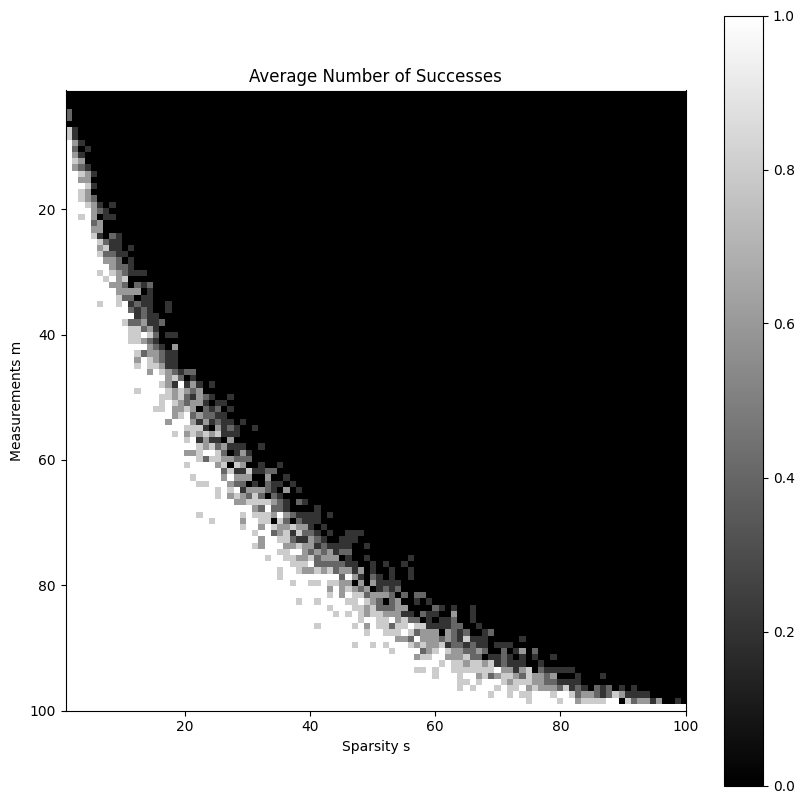

In [51]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

n = 100
results = np.zeros((100, 100))  # Matrix to store the number of successes

for m in range(1, 101):
    for s in range(1, 101):
        successes = 0
        for _ in range(5):  # Repeat each experiment 5 times
            A = np.random.randn(m, n)
            x_star_indices = np.random.choice(n, s, replace=False)
            x_star = np.zeros(n)
            x_star[x_star_indices] = 1
            y = A @ x_star

            # Solve the L1 minimization problem
            x = cp.Variable(n)
            objective = cp.Minimize(cp.norm(x, 1))
            constraints = [A @ x == y]
            problem = cp.Problem(objective, constraints)
            problem.solve()

            # Check success
            x_hat = x.value
            if np.linalg.norm(x_hat - x_star, 2) / np.linalg.norm(x_star, 2) <= 1e-4:
                successes += 1

        results[m - 1, s - 1] = successes / 5.0  # Store the average success rate

# Plot the results
plt.figure(figsize=(10, 10))
plt.imshow(results, cmap="gray", extent=[1, 100, 100, 1])
plt.colorbar()
plt.title("Average Number of Successes")
plt.xlabel("Sparsity s")
plt.ylabel("Measurements m")
plt.show()

In [2]:
import cvxpy as cp
import numpy as np


def check_gamma(gamma, coeffs):

    Q = cp.Variable((3, 3), symmetric=True)
    constraints = [
        Q[0, 0] == coeffs[0] - gamma,
        Q[1, 0] + Q[0, 1] == coeffs[1],
        Q[1, 1] + Q[0, 2] + Q[2, 0] == coeffs[2],
        Q[2, 1] + Q[1, 2] == coeffs[3],
        Q[2, 2] == coeffs[4],
    ]

    prob = cp.Problem(cp.Minimize(0), constraints + [Q >> 0])
    prob.solve(solver=cp.SCS)
    return prob.status == cp.OPTIMAL


def binary_search(f, low, high, tol=1e-6):

    while high - low > tol:
        mid = (high + low) / 2
        if f(mid):
            low = mid
        else:
            high = mid
    return low


coeffs = [5, 4, 6, 4, 1]
max_gamma = binary_search(lambda g: check_gamma(g, coeffs), 3, 5)
print(max_gamma)

4.000157356262207


In [5]:
import cvxpy as cp
import numpy as np


def check_gamma(gamma, coeffs):
    Q = cp.Variable((4, 4), symmetric=True)
    constraints = [
        Q[0, 0] == coeffs[0] - gamma,
        Q[1, 0] + Q[0, 1] == coeffs[1],
        Q[1, 1] + Q[0, 2] + Q[2, 0] == coeffs[2],
        Q[2, 1] + Q[1, 2] + Q[3, 0] + Q[0, 3] == coeffs[3],
        Q[2, 2] + Q[3, 1] + Q[1, 3] == coeffs[4],
        Q[3, 2] + Q[2, 3] == coeffs[5],
        Q[3, 3] == coeffs[6],
    ]

    prob = cp.Problem(cp.Minimize(0), constraints + [Q >> 0])
    prob.solve(solver=cp.SCS)
    return prob.status == cp.OPTIMAL


def binary_search(f, low, high, tol=1e-6):
    while high - low > tol:
        mid = (high + low) / 2
        if f(mid):
            low = mid
        else:
            high = mid
    return low


coeffs_p1 = [0, 0, 4, 10, 4, 0, 1]
coeffs_p2 = [0, 0, 6, 10, 4, 0, 1]

max_gamma_p1 = binary_search(lambda g: check_gamma(g, coeffs_p1), -4, 4)
max_gamma_p2 = binary_search(lambda g: check_gamma(g, coeffs_p2), -4, 4)
print(max_gamma_p1)
print(max_gamma_p2)


-0.9997215270996094
2.288818359375e-05
